# Plot Simpson quadrature rule

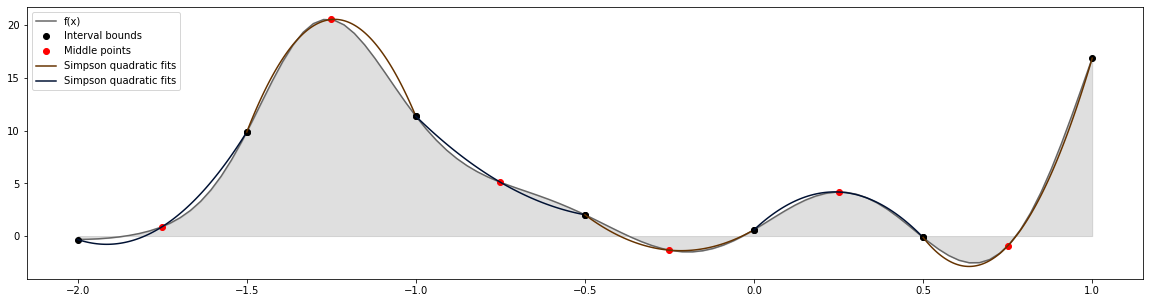

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import jn

n=0
# Define the function to be integrated
def f(x):
    return 0.5*np.exp(1.2*(1/7*np.cos(1/2*x) + 3*np.sin(x**2))) + np.sin(7*x) * np.exp(x+1)

def polyfit_with_fixed_points(n, x, y, xf, yf) :
    mat = np.empty((n + 1 + len(xf),) * 2)
    vec = np.empty((n + 1 + len(xf),))
    x_n = x**np.arange(2 * n + 1)[:, None]
    yx_n = np.sum(x_n[:n + 1] * y, axis=1)
    x_n = np.sum(x_n, axis=1)
    idx = np.arange(n + 1) + np.arange(n + 1)[:, None]
    mat[:n + 1, :n + 1] = np.take(x_n, idx)
    xf_n = xf**np.arange(n + 1)[:, None]
    mat[:n + 1, n + 1:] = xf_n / 2
    mat[n + 1:, :n + 1] = xf_n.T
    mat[n + 1:, n + 1:] = 0
    vec[:n + 1] = yx_n
    vec[n + 1:] = yf
    params = np.linalg.solve(mat, vec)
    return params[:n + 1]

# Generate the x-values for plotting
x = np.linspace(-2, 1, 100)
xx = np.linspace(-2, -1.5, 100)
# Compute the function values at the x-values
y = f(x)

# Plot the function
plt.figure(figsize=(20,5))
plt.plot(x, y, label='f(x)', color='#666666')
plt.fill_between(x, y, color='gray', alpha=0.25)



params = polyfit_with_fixed_points(2, x , y, [-2, -1.75, -1.5], [f(-2), f(-1.75), f(-1.5)])
poly = np.polynomial.Polynomial(params)
plt.plot(-2, [f(-2)], 'o', color='black')
plt.plot(-1.75,  f(-1.75), 'ro')
plt.plot(-1.5, f(-1.5), 'o', color='black')
plt.plot(xx, poly(xx), '-', color='#001133')


########

# Generate the x-values for plotting
x = np.linspace(-2, 1, 100)
xx2 = np.linspace(-1.5, -1, 100)




params = polyfit_with_fixed_points(2, x , y, [-1.5, -1.25, -1], [f(-1.5), f(-1.25), f(-1)])
poly = np.polynomial.Polynomial(params)

plt.plot(-1, [f(-1)], 'o', color='black')
plt.plot(-1.25,  f(-1.25), 'ro')
plt.plot(-1.5, f(-1.5), 'o', color='black')
plt.plot(xx2, poly(xx2), '-', color='#663300')



########

# Generate the x-values for plotting
x = np.linspace(-2, 1, 100)
xx3 = np.linspace(-1, -0.5, 100)


params = polyfit_with_fixed_points(2, x , y, [-1, -0.75, -0.5], [f(-1), f(-0.75), f(-0.5)])
poly = np.polynomial.Polynomial(params)

plt.plot(-1, [f(-1)], 'o', color='black')
plt.plot(-0.75,  f(-0.75), 'ro')
plt.plot(-0.5, f(-0.5), 'o', color='black')
plt.plot(xx3, poly(xx3), '-', color='#001133')


########

# Generate the x-values for plotting
x = np.linspace(-2, 1, 100)
xx4 = np.linspace(-0.5, 0, 100)



params = polyfit_with_fixed_points(2, x , y, [-0.5, -0.25, 0], [f(-0.5), f(-0.25), f(0)])
poly = np.polynomial.Polynomial(params)
plt.plot(-0.5, [f(-0.5)], 'o', color='black', label='Interval bounds')
plt.plot(-0.25,  f(-0.25), 'ro', label='Middle points')
plt.plot(0, f(0), 'o', color='black')
plt.plot(xx4, poly(xx4), '-', color='#663300', label='Simpson quadratic fits')


# Generate the x-values for plotting
x = np.linspace(-2, 1, 100)
xx5 = np.linspace(0, 0.5, 100)



params = polyfit_with_fixed_points(2, x , y, [0, 0.25, 0.5], [f(0), f(0.25), f(0.5)])
poly = np.polynomial.Polynomial(params)
plt.plot(0, [f(0)], 'o', color='black')
plt.plot(0.25,  f(0.25), 'ro')
plt.plot(0.5, f(0.5), 'o', color='black')
plt.plot(xx5, poly(xx5), '-', color='#001133', label='Simpson quadratic fits')



# Generate the x-values for plotting
x = np.linspace(-2, 1, 100)
xx5 = np.linspace(0.5, 1, 100)




params = polyfit_with_fixed_points(2, x , y, [0.5, 0.75, 1], [f(0.5), f(0.75), f(1)])
poly = np.polynomial.Polynomial(params)
plt.plot(0.5, [f(0.5)], 'o', color='black')
plt.plot(0.75,  f(0.75), 'ro')
plt.plot(1, f(1), 'o', color='black')
plt.plot(xx5, poly(xx5), '-', color='#663300')
plt.legend()

plt.show()